# 관심있는 주제와 데이터 
- 주제: 일론 머스트의 트윗이 테슬라 주가 변동에 미치는 영향 분석을 통한 단기 매매 전략 수립
- 데이터 : https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021
- 테슬라 주가는 실적, 생산량, 경제 지표와 같은 전통적 요인 뿐만 아니라 일론 머스크의 트윗과 발언에도 민감하게 반응하는 특징을 보인다.  
  이에 머스크 트윗에 테슬라 주가가 얼마나 변동하며, 다시 안정되기까지 얼마만큼의 시간이 소요되는지를 분석하여 단기 매매 전략을 수립하거나, 장기 투자의 필요성을 강조한다.

# Titanic 데이터 전처리 & EDA

## 0. 개요
### (1)Titanic 데이터 배경지식
    - 1912년 4월 15일 RMS Titanic 이 북대서양에서 빙산과 충돌하여 침몰한 사건을 바탕으로 만들어진 데이터셋
    - '여자와 아이들 먼저' 라는 구조 원칙을 적용했다 
    
### (2)데이터셋의 구성  
- survived : 생진 여부 (사망 = 0 , 생죤 = 1)
- Pclass : 객신 등급 (1등석 = 1 , 2등석 = 2 , 3등석 = 3)
- Name : 승객 이름
- Sex : 성별
- Age: 나이
- SibSp: 같이 탄 형제/ 배우자 수
- Parch : 같이 탄 부모/ 자식 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실 번호
-Embarked : 탑승한 항구 ( C, Q , S )

### (3)가설
 1. 남성보다 여성의 생존률이 더 높을 것이다. 
 2. 1등석 생존률이 2등석, 3등석 생존률보다 높을 것이다.
 3. 어린이가 어른보다 생존률이 높을 것이다.

# 1.1 라이브러리 불러오기

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1.2 데이터 불러오기
 - titanic 데이터를 불러와 df 라는 변수에 담는다

In [52]:
df = pd.read_csv(r"C:\Users\yms10\BAF-17-Fresh-Eduu\Titanic-Dataset.csv")

# 2. 데이터 미리보기
 - head, tail, info, shape 등을 사용하여 데이터 정보 확인하기
 - column명도 확인한다

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.shape  #891행 12열

(891, 12)

In [55]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [56]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
# 데이터 타입 확인하기
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 3. 결측치 처리하기

## 3.1 isnull 을 이용해 결측치를 확인하고 시각화한다

In [58]:
df.isnull().sum() #각 칼럼별로 결측치의 갯수를 세서 더한 값  => Age 와 Cabin, Embarked 열만 결측치가 있다

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

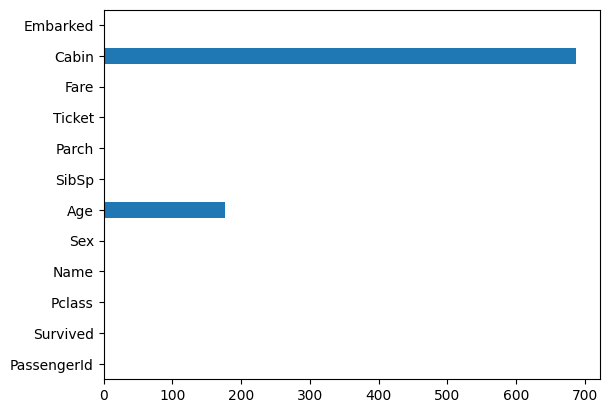

In [59]:
null_count = df.isnull().sum()
null_count.plot.barh() #열별로 결측치의 수를 그래프로 나타냈다.

In [60]:
# 결측치 정보를 데이터 프레임 형태로 변환 => df_null_count 라는 변수에 담는다
df_null_count = null_count.reset_index()
df_null_count

,index,0
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


In [61]:
#df_null_count 칼럼명을 지정하고, 결측치가 많은 순으로 정렬한다
df_null_count.columns = ["column name", "null_count"]  #이름 지정
df_null_count.sort_values("null_count", ascending= False) #결측치 많은 순으로 내림차순 정렬


,column name,null_count
10,Cabin,687
5,Age,177
11,Embarked,2
0,PassengerId,0
3,Name,0
2,Pclass,0
1,Survived,0
4,Sex,0
7,Parch,0
6,SibSp,0


## 3.2 결측치 처리하기
 - Cabin : 결측 비율이 높으므로 제거한다.  
 - Age : 중요한 정보이므로 평균값으로 채운다.  
 - Embarked : 결측치가 2개뿐이고, 선택지가 3가지 뿐으므로 최빈값으로 채운다.

### 3.2.1 cabin 제거하기

In [62]:
df.shape

(891, 12)

In [63]:
df = df.drop("Cabin", axis= 1) #cabin column 삭제
df.shape #열이 12개에서 11개로 줄었다.

(891, 11)

### 3.2.2 Age 결측치 채우기
 1. 평균값 구하기  
 2. 결측치 채우기

In [64]:
# 1. 평균값 구해서 변수에 할당하기
age_mean = df["Age"].mean()

In [65]:
# 2. 결측치 채우기
df["Age"].fillna(age_mean,inplace= True)

C:\Users\yms10\AppData\Local\Temp\ipykernel_16196\2256218100.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(age_mean,inplace= True)


In [66]:
# 3. Age 결측치 잘 채워졌나 확인
df["Age"].isnull().sum()

np.int64(0)

### 3.2.3 Embarked 결측치 채우기
 1. 최빈값 구하기  
 2. 결측치 채우기

In [67]:
# 1. 최빈값 구해서 변수 할당 => 최빈값은 S다!
df["Embarked"].value_counts()

embarked_many = df["Embarked"].mode()[0]

In [68]:
# 2. s 로 결측치 채운다.
df ["Embarked"].fillna(embarked_many, inplace= True)

C:\Users\yms10\AppData\Local\Temp\ipykernel_16196\488315272.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df ["Embarked"].fillna(embarked_many, inplace= True)


In [69]:
#3. 결측치 사라졌나 확인
df["Embarked"].isnull().sum()

np.int64(0)

# 4 . 데이터 분석

## 4.1 성별에 따른 생존자 분석

In [70]:
#1. 성별에 따른 생존자 비율 구하기
df.groupby("Sex")["Survived"].value_counts(normalize= True) 

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

<Axes: xlabel='Sex', ylabel='Survived'>

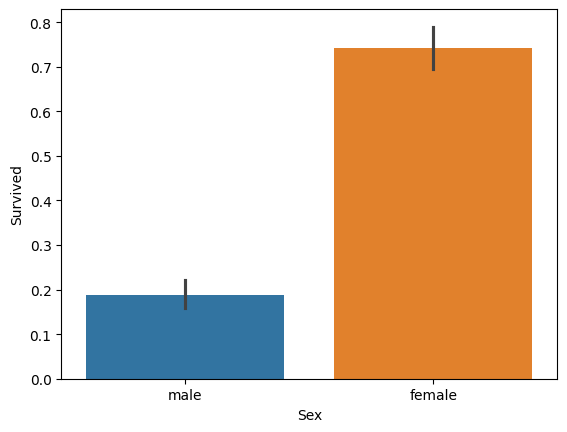

In [71]:
# 2. 시각화
sns.barplot(x = "Sex" , y = "Survived", data = df, hue = "Sex")
#여성 생존자가 남성 생존자보다 압도적으로 많음

## 4.2 나이에 따른 생존률 분석

In [72]:
df.groupby("Age")["Survived"].value_counts()
# 나이를 그룹별로 묶는 것이 좋겠다!

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: count, Length: 144, dtype: int64

In [81]:
# 구조 우선 대상이었던 어린이: 1세~12세  
#청소년: 13세~19세
#청년: 20세~ 29세
#중장년: 30세~ 49세
#노년: 50세~
#가설 수정: 어린이의 생존율이 가장 높고, 노년의 생존율이 가장 낮을 것이다
def age_group(age):
    if age < 13:
        return "Child"
    elif age <20:
        return "Teen"
    elif age < 30 :
        return "YoungAdult"
    elif age < 50 :
        return "Adult"
    else : 
        return "Senior"
    
df["AgeGroup"] = df["Age"].apply(age_group)


In [84]:
age_group_sur=df.groupby("AgeGroup")["Survived"].mean().round(2) #나이 그룹 별 생존률 평균 내기 소수점 둘째자리까지
age_group_sur

AgeGroup
Adult         0.42
Child         0.58
Senior        0.36
Teen          0.41
YoungAdult    0.32
Name: Survived, dtype: float64

In [85]:
df["AgeGroup"].head(5)

0    YoungAdult
1         Adult
2    YoungAdult
3         Adult
4         Adult
Name: AgeGroup, dtype: object

In [86]:
age_group_sorted = age_group_sur.sort_values(ascending= False)
age_group_sorted #그룹별 생존률 내림차순 정렬

AgeGroup
Child         0.58
Adult         0.42
Teen          0.41
Senior        0.36
YoungAdult    0.32
Name: Survived, dtype: float64

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='AgeGroup'>

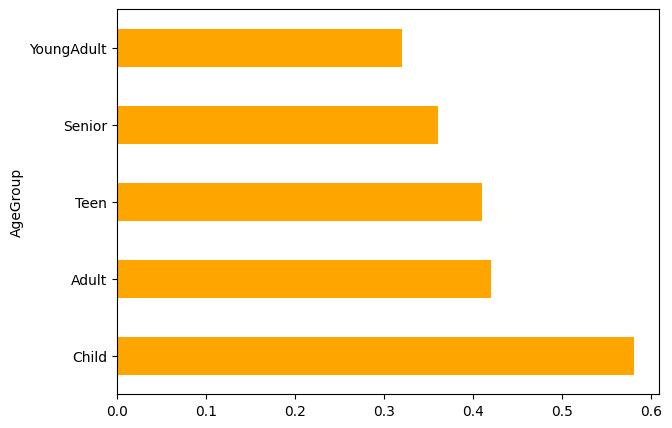

In [ ]:
age_group_sorted.plot.barh(color = 'orange' , figsize = (7,5) )

#=> 어린이의 생존률이 가장 높다
# 예상 외로 가장 생존률이 낮은 층은 20세~29세 사이였다.

## 4.3 객실 등급에 따른 생존율 분석

In [ ]:
#객실 등급별 생존자 수와 사망자 수 확인
df.groupby("Pclass")['Survived'].value_counts()


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [ ]:
#객실 등급별 생존자 수와 사망자 수 비율 확인
df.groupby('Pclass')["Survived"].value_counts(normalize= True)


Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

<Axes: ylabel='Pclass'>

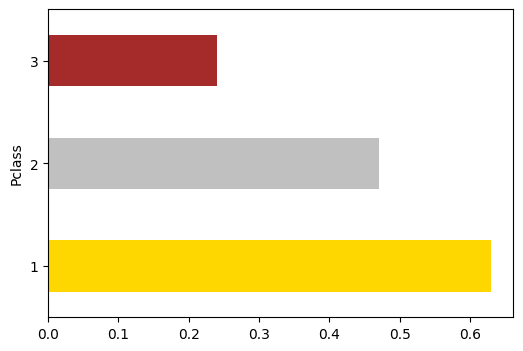

In [ ]:
# 시각화
pclass_survival = df.groupby("Pclass")["Survived"].mean().round(2)
pclass_survival.plot.barh(figsize = (6,4) , color = ["gold", "silver", "brown"] )

#객실 등급별 생존율이 유의미하게 차이나는 것을 볼 수 있다.